In [1]:
import gzip
import os
import pickle
from tqdm import tqdm
from Utilities import *

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({"pdf.fonttype": 42, 'text.usetex': True})

In [3]:
seed_list = [0, 1, 2, 3, 4, 5]

# Exact solution in 1d

In [4]:
path = 'diffusion_relu1d_gamma100_ts-10.pkl.gz'
with gzip.open(path, 'rb') as f:
    diffusion = pickle.load(f)

In [5]:
dict = {}

for seed in tqdm(seed_list):
    ## unbiased risk, regularization lambda = -4.0
    path = f'VarPro_ReLU_1d_unbiased/results/width1024_lmbda-4.0_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
    with gzip.open(path, 'rb') as f:
        dict[seed] = pickle.load(f)

100%|██████████| 6/6 [00:24<00:00,  4.00s/it]


In [6]:
M = diffusion.shape[1]
X = np.linspace(-np.pi, np.pi, M+1)
X = 0.5 * (X[1:]+X[:-1])

Creating animation...


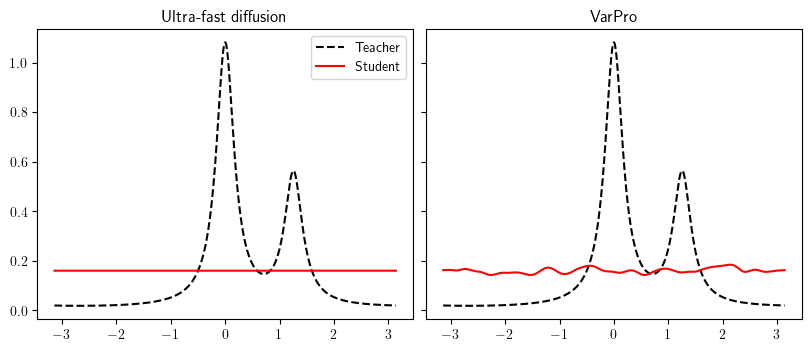

In [30]:
time = 10
fps = 10
frames = time * fps

max_time = 8
max_frame = max_time * 2**10
rate = max_frame // frames
idx = np.arange(0, max_frame, rate)

p=0.2
fig, ax = plt.subplots(1, 2, figsize=(40 * p, 17 * p), constrained_layout=True, sharey=True)

f_star = normalize(1 / (1 + 100 * np.sin(X/2)**2) + 0.5 / (1 + 100 * np.sin((X-0.4*np.pi)/2)**2))
ax[0].plot(X, f_star, color='black', linestyle='--', linewidth=1.5, label='Teacher')
ax[1].plot(X, f_star, color='black', linestyle='--', linewidth=1.5, label='Teacher')


cax0, = ax[0].plot([], [], color='red', linewidth=1.5, label='Student')
cax1, = ax[1].plot([], [], color='red', linewidth=1.5, label='Student')

def update(i):
    cax0.set_data(X, diffusion[idx[i]])

    f = np.empty(0)
    for seed in seed_list:
        w = dict[seed]['student_state_list'][idx[i]]['feature_model.weight'].numpy()
        f = np.append(f, circle_to_line(w))
    z, density = gaussian_conv(f, N_points=M, scale=0.1)
    cax1.set_data(z, density)

    return [cax0, cax1]

ax[0].set_title('Ultra-fast diffusion')
ax[1].set_title('VarPro')
ax[0].legend()

print("Creating animation...")
anim = animation.FuncAnimation(fig, update, frames, blit=False, interval=1)

In [31]:
writer = animation.PillowWriter(fps=10)
anim.save("diffusion_animation_kde.gif", writer=writer)

/Users/rbarboni/Documents/GitHub/VarPro/Utilities.py:181: RuntimeWarning: divide by zero encountered in divide
  return 2 * np.arctan( x[:,1] / (1+x[:,0]))


In [12]:
x = np.empty(0)

In [13]:
x

array([], dtype=float64)

In [16]:
np.append(x, [1, 2, 3])

array([1., 2., 3.])

In [17]:
x

array([], dtype=float64)